<a href="https://colab.research.google.com/github/monikamikhaiel/Automating-Real-World-Tasks-with-Python-/blob/main/Multiple_Antennas_qtable_heat_map_edgedetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np  # for array stuff and random
import matplotlib.pyplot as plt  # for graphing our mean rewards over time
from matplotlib.pyplot import figure
from matplotlib import style  # to make pretty charts because it matters.
import time  # using this to keep track of our saved Q-Tables.
style.use("ggplot")  # setting our style!

In [20]:
import cv2
src = cv2.imread('/content/master_bathroom_floor_plan_3.jpg', cv2.IMREAD_UNCHANGED)

#percent by which the image is resized
scale_percent = 200

#calculate the 50 percent of original dimensions
width = int(src.shape[1] * scale_percent / 100)
height = int(src.shape[0] * scale_percent / 100)

# dsize
dsize = (width, height)

# resize image
output = cv2.resize(src, dsize)

cv2.imwrite('/content/master_bathroom_floor_plan_3.jpg',output) 
#src = cv2.imread('/content/Inkedmaster_bathroom_floor_plan_7_.jpg', cv2.IMREAD_UNCHANGED)
#print(src.shape[1],src.shape[0])

True

[[  0   0   0 255   0   0   0   0   0 255   0   0 255   0 255   0]
 [  0   0   0 255 255   0 255 255   0 255   0   0   0   0 255   0]
 [  0   0 255   0 255 255 255   0   0 255   0 255 255 255 255   0]
 [  0 255   0   0   0   0   0   0   0 255 255   0   0   0 255   0]
 [  0 255   0   0   0   0   0   0   0   0   0   0   0   0 255   0]
 [  0 255   0   0   0   0   0   0   0   0   0   0   0   0 255   0]
 [  0   0 255   0   0   0   0   0   0   0   0   0   0   0 255   0]
 [  0 255 255   0 255 255   0   0   0   0   0   0   0 255 255   0]
 [  0   0   0 255   0 255   0   0   0   0   0   0   0 255   0   0]
 [  0   0   0   0   0   0 255   0   0   0   0   0   0 255   0   0]
 [255 255   0 255 255 255   0   0   0   0   0   0   0 255 255   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 255   0   0]
 [  0 255   0   0   0   0   0   0   0   0   0   0   0 255   0   0]
 [  0 255 255   0   0   0   0   0   0   0   0   0 255 255 255   0]
 [255   0   0 255 255 255   0   0   0   0 255 255   0 255   0 

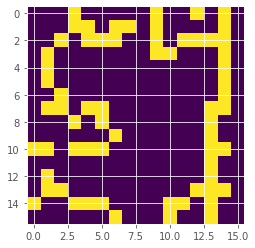

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# read the image
image = cv2.imread("/content/master_bathroom_floor_plan_3.jpg")
# convert it to grayscale
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# show the grayscale image
#plt.imshow(gray, cmap="gray")
#plt.show()
# perform the canny edge detector to detect image edges
edges = cv2.Canny(image,threshold1=30, threshold2=100)
print(edges)
plt.imshow(edges)
plt.show()
cv2.destroyAllWindows()
#cv2.waitkey(0)
xcoord=[]
ycoord=[]
width,length,_=image.shape

In [22]:
#the size of the area 
#SIZE_W = int(input("please enter the width of the building in meter :"))
#SIZE_H = int(input("please enter the height of the building in meter :"))
#print(SIZE_H,SIZE_W)

In [23]:
## detect the walls 
TupleWallsIndex=[]
for i in range (width):
  for j in range (length):
    if edges[i][j] == 255:
      TupleWallsIndex.append((i,j))
print(TupleWallsIndex)
SIZE_H=length
SIZE_W=width

[(0, 3), (0, 9), (0, 12), (0, 14), (1, 3), (1, 4), (1, 6), (1, 7), (1, 9), (1, 14), (2, 2), (2, 4), (2, 5), (2, 6), (2, 9), (2, 11), (2, 12), (2, 13), (2, 14), (3, 1), (3, 9), (3, 10), (3, 14), (4, 1), (4, 14), (5, 1), (5, 14), (6, 2), (6, 14), (7, 1), (7, 2), (7, 4), (7, 5), (7, 13), (7, 14), (8, 3), (8, 5), (8, 13), (9, 6), (9, 13), (10, 0), (10, 1), (10, 3), (10, 4), (10, 5), (10, 13), (10, 14), (11, 13), (12, 1), (12, 13), (13, 1), (13, 2), (13, 12), (13, 13), (13, 14), (14, 0), (14, 3), (14, 4), (14, 5), (14, 10), (14, 11), (14, 13), (15, 6), (15, 10), (15, 13)]


In [24]:
HM_EPISODES = 2500
epsilon = 0.5  # randomness
EPS_DECAY = 0.9999  # Every episode will be epsilon*EPS_DECAY
SHOW_EVERY = 100  # how often to play through env visually.

start_q_table = None  # if we have a pickled Q table, we'll put the filename of it here.

LEARNING_RATE = 0.1
DISCOUNT = 0.95
ANTENNA_N = int(input("please enter the number of antennas ?"))  # NUMBER OF ANTENNAS 
#SNR RANGES
snr_range={"highSNR_max":-50,"highSNR_min":-80,
           "mediumSNR_max":-90,"mediumSNR_min":-100,
          "deadzone":-120}


please enter the number of antennas ?2


In [25]:
#antenna
class antenna:
    def __init__(self,x_,y_):
      if not x_:
        self.x = np.random.randint(0, SIZE_W)
      else:
        self.x=x_
      if not y_:
        self.y = np.random.randint(0, SIZE_H)
      else:
        self.y=y_
    def __str__(self):
        return f"{self.x}, {self.y}"
    def __sub__(self, other):
        return (self.x-other.x, self.y-other.y)
    def action(self, choice):
        '''
        Gives us 4 total movement options. (0,1,2,3)
        '''
        if choice == 0:  #up
            #self.move(x=0, y=1)
            self.x=self.x
            self.y+=1
            self.move()

        elif choice == 1:  #down
            #self.move(x=0, y=-1)
            self.x=self.x
            self.y-=1
            self.move()

        elif choice == 2:  #left
           # self.move(x=-1, y=0)
            self.x-=1
            self.y=self.y
            self.move()

        elif choice == 3:    #right
            # self.move(x=1, y=0)
            self.x+=1
            self.y=self.y
            self.move()

#    def move(self, x=False, y=False):
    def move(self):
        # If no value for x, move randomly
      #  if not x:
      #      self.x += np.random.randint(-1, 2)
       # elif x==0:
      #      self.x=self.x
      #  else:
       #     self.x += x

        # If no value for y, move randomly
       # if not y:
        #    self.y += np.random.randint(-1, 2)
       # elif y==0:
        #    self.y=self.y
       # else:
        #    self.y += y
      # If we are out of bounds, fix!
        if self.x < 0:
            self.x = 0
        elif self.x > SIZE_W-1:
            self.x = SIZE_W-1
        if self.y < 0:
            self.y = 0
        elif self.y > SIZE_H-1:
            self.y = SIZE_H-1



In [27]:
ant = antenna(2,3)
print(ant)
ant.action(0) # up
print(ant)
ant.action(1) #down 
print(ant)
ant.action(2) #left
print(ant)
ant.action(3) #right 
print(ant)


2, 3
2, 4
2, 3
1, 3
2, 3


In [28]:
x = SIZE_W # Building X
y = SIZE_H # Building Y
z = 4 # actions
## increase the size of a qtable dynamically from the number of antennas 
q_table={}
for i in range(ANTENNA_N):
  q_table[i]=np.zeros((x,y,z))
  print(q_table[i].shape)

#print(q_table)
# q_table *= 0

(16, 16, 4)
(16, 16, 4)


In [29]:
def dict_Bet_Edges(TupleWallsIndex,SIZE_H,SIZE_W):
  dict_values_edges={}
  for i in range(SIZE_H):
    for j in range(SIZE_W):
      for n in range(len(TupleWallsIndex)):
        if n<len(TupleWallsIndex)-1:
          x,y=TupleWallsIndex[n]
          x1,y1=TupleWallsIndex[n+1]
       # print(x,i,x1,y,j,y1)
          if x<=i<=x1:
            if y<=j<=y1:
              #print(x,i,x1,y,j,y1)
              dict_values_edges[i,j]=10
          else:
              dict_values_edges[i,j]=1
        else:
          break
  return dict_values_edges 
      
dict_Bet_Edges(TupleWallsIndex,SIZE_H,SIZE_W)
print(len(dict_Bet_Edges(TupleWallsIndex,SIZE_H,SIZE_W)))
print(dict_Bet_Edges(TupleWallsIndex,SIZE_H,SIZE_W)[0,1])



256
1


In [30]:
#okomora model 
dict_values_edges=dict_Bet_Edges(TupleWallsIndex,SIZE_H,SIZE_W)
def okomora(ant,SIZE_H,SIZE_W,dict_values_edges=dict_values_edges):
  PathLoss=[]
  attenuation= 13 #in db function of frequency and distance 
  freq= 2.4*(10^9) # the frequency og the signal
  c= 3*(10^8) # the speed of light
  #hte = input("please enter the height of the transmitter antenna ? ")
  #hre = input("please enter the height of the receiver antenna ? ")
  hte= 20
  hre= 2
  G_hte = 10*np.log(int(hte) /200) 
  G_hre = 10*np.log(int(hre)/ 3)
  G_Area =27 # (Quasi Open Area)
  for i in range(SIZE_H):
    for j in range(SIZE_W):
      difference = [ant.x-i,ant.y-j]
      if difference == [0,0]:
        continue
      else:
        ## calculate the pathloss
        distance=pow((pow(difference[0],2)+pow(difference[1],2)),0.5)
        #values=dict_Bet_Edges(TupleWallsIndex,SIZE_H,SIZE_W)
        if (i,j) in dict_values_edges.keys():
          x=dict_values_edges[i,j]
          distance*=x
        FPL      = 20*np.log(4*np.pi*distance*freq/c)
        Path_Loss = FPL + attenuation - G_hte - G_hre - G_Area
          #Path_Loss*=10
        PathLoss.append(Path_Loss)
  return PathLoss  
#okomora(ant,SIZE_H,SIZE_W)  
#len(okomora(ant,SIZE_H,SIZE_W))

In [31]:
def AnglesInDegrees(ant,SIZE_H,SIZE_W):
  theta=[]
  for i in range(SIZE_H):
    for j in range(SIZE_W):
      difference = [ant.x-i,ant.y-j]
      if difference==[0,0]: # the same position as the antenna 
        continue
      if difference[0]==0:     # the angle itself is either 90 or 270 tan will be infinite 
          if difference[1]>0:
            t=90
            theta.append(90)
          else:
            t=270
            theta.append(270)
      else:
          tantheta= difference[1]/difference[0]
          t=np.degrees(np.arctan(tantheta))
          if t <=0:
            t+=360
            theta.append(t)
          else:
            theta.append(t)
  return theta
#print(len(AnglesInDegrees(ant,SIZE_H,SIZE_W)))

In [32]:
def measureSNR(ant,SIZE_H,SIZE_W,typeOfAntenna="omnidirectionnel",dict_values_edges=dict_values_edges):
  Path_Loss=okomora(ant,SIZE_H,SIZE_W,dict_values_edges)
  Gain=[]
  if typeOfAntenna == "omnidirectionnel" :
    Gain_pannel=7 #in db
    for i in range(len(Path_Loss)):
      Gain.append(Gain_pannel-Path_Loss[i])
  elif typeOfAntenna == "directionnel":
    thetas=AnglesInDegrees(ant,SIZE_H,SIZE_W)
    GainVsTheta={360:-20,30:-10,60:-5,90:15,120:0,150:-10,180:-20,210:-10,240:-8,270:-15,300:-8,330:-10} # values in db angle:gain
    for i in range(len(thetas)):
      t=thetas[i]
      if t==0:
       value = GainVsTheta[360]
      elif t<=30:
        value = GainVsTheta[30]
      elif 30<t<=60:
        value = GainVsTheta[60]
      elif 60<t<=90:
        value = GainVsTheta[90]
      elif 90<t<=120:
        value = GainVsTheta[120]
      elif 120<t<=150:
        value = GainVsTheta[150]
      elif 150<t<=180:
        value = GainVsTheta[180]
      elif 180<t<=210:
        value = GainVsTheta[210]
      elif 210<t<=240:
        value = GainVsTheta[240]
      elif 240<t<=270:
        value = GainVsTheta[270]
      elif 270<t<=300:
        value = GainVsTheta[300]
      elif 300<t<=330:
        value = GainVsTheta[330]
      elif 330<t<=360:
        value = GainVsTheta[360]
      Gain.append(value-Path_Loss[i])
  Magnitude=[]
  for g in Gain:
    mag=pow(10,(g/10))
    Magnitude.append(mag)
  return Magnitude
#measureSNR(ant,SIZE_H,SIZE_W,typeOfAntenna="omnidirectionnel")


In [33]:
def calSNRlow(SNR,TypeOfReward):
  if TypeOfReward=="AverageSNR":
   return np.mean(SNR)
  else:
    counter =0
    percent=0
    min= 5.095204897841283e-9
    for i in range(len(SNR)):
      if SNR[i] < min:
        counter+=1
        percent=counter*100/len(SNR)
    return percent
ant=antenna(2,3)
calSNRlow(measureSNR (ant,SIZE_H,SIZE_W),TypeOfReward="AverageSNR")

1.9195965638932428e-08

In [34]:
def differnceXandY(ant1,ant2):
  diff_X= ant1.x-ant2.x
  diff_Y= ant1.y-ant2.y
  return diff_X,diff_Y

In [35]:
def RewardCalc(antennas_object,ANTENNA_N,typeOfAntenna="omnidirectionnel",TypeOfReward="AverageSNR"):
  mini_distance_X= 1
  mini_distance_Y= 1   
  antennas_meanSNR={} # antenna and their mean values
  #antennas_object={} # antenna and their classes
  reward=0
  reward_arr=np.zeros(((SIZE_H*SIZE_W)))
  Magnitude=[]
  for i in range(ANTENNA_N):
    #antennas_object[i]=antenna()
    antennas_meanSNR[i]=measureSNR(antennas_object[i],SIZE_H,SIZE_W,typeOfAntenna=typeOfAntenna)
    #print(antennas_meanSNR[i])
    #shift the list of SNRs before multiplying /or adding them 
    # to db
    antennas_meanSNR[i]=10*np.log10(antennas_meanSNR[i])
    ## if rect 
    if SIZE_H>SIZE_W:
      position=(SIZE_W*(antennas_object[i].x)) + (antennas_object[i].y)
    else:
      position=(SIZE_H*(antennas_object[i].y)) + (antennas_object[i].x)
    if len(antennas_meanSNR[i]) >= len(reward_arr) :
      continue
    else:
      antennas_meanSNR[i]=np.insert(antennas_meanSNR[i],position,0)
    #print(len(antennas_meanSNR[i]),len(reward_arr),antennas_object[i].x,antennas_object[i].y)
  #print(antennas)
    reward_arr=np.add(reward_arr,antennas_meanSNR[i])
    # magnitude
  # from db to magnitude 
    for g in reward_arr:
      mag=pow(10,(g/10))
      Magnitude.append(mag)
  reward=calSNRlow(Magnitude,TypeOfReward=TypeOfReward)
  #reward/=ANTENNA_N
  #calculate the difference between each 2 antennas  
  for i in range(ANTENNA_N):
    for j in range(i):
      if i==j:
        continue
      else:
        #print(i,j)
        x,y=differnceXandY(antennas_object[i],antennas_object[j]) 
        if (x <= mini_distance_X) & (y <= mini_distance_Y):
          reward*=0.1 
        if reward==0:
          break
#convert from db into magnitude 
  #  mag=pow(10,(reward/10))
  return reward  
antennas_object={}
for i in range(ANTENNA_N):
  antennas_object[i]=antenna(2+i,3+i)
  #print( antennas_object[i].x, antennas_object[i].y)

RewardCalc(antennas_object,ANTENNA_N)

0.00019531347086508436

In [36]:
def TrainingAgent(HM_EPISODES=HM_EPISODES,EPS_DECAY=EPS_DECAY,LEARNING_RATE=LEARNING_RATE,DISCOUNT=DISCOUNT,epsilon=epsilon,
                  ANTENNA_N=ANTENNA_N,SIZE_H=SIZE_H,SIZE_W=SIZE_W,typeOfAntenna="omnidirectionnel",TypeOfReward="AverageSNR",TupleWallsIndex=TupleWallsIndex):
  dict_values_edges=dict_Bet_Edges(TupleWallsIndex,SIZE_H,SIZE_W)
## actions
  actions={}
## antennas object
  antennas_object={} # antenna and their classes
##
  episode_rewards = []
  reward=0
  for episode in range(HM_EPISODES):
      x_=np.random.randint(0, SIZE_W)
      y_=np.random.randint(0, SIZE_H)
      for i in range(ANTENNA_N):
        antennas_object[i]=antenna(x_,y_)
      if episode % SHOW_EVERY == 0:
          print(f"on #{episode}")
       # print(f"{SHOW_EVERY} ep mean: {np.mean(episode_rewards[-SHOW_EVERY:])}")
          show = True
      else:
          show = False

      episode_reward = 0
      for i in range(200):
        if np.random.random() > epsilon:
          for i in range(ANTENNA_N):
            actions[i] = np.argmax(q_table[i][antennas_object[i].x][antennas_object[i].y]) # antenna 1
        else:
          for i in range(ANTENNA_N):
            actions[i] = np.random.randint(0, 4) #low is inclusive high is exclusive
            #print(action)
        # Take the action!
        for i in range(ANTENNA_N):
          antennas_object[i].action(actions[i]) #move the  antenna
        ###
        #calculate the SNR
        reward=RewardCalc(antennas_object,ANTENNA_N,typeOfAntenna=typeOfAntenna,TypeOfReward=TypeOfReward)
          ###
        #current_q = q_table[state][action]
        #antena 1
        for i in range(ANTENNA_N):
            newAntennaPos = (ant)
            current_q = q_table[i][antennas_object[i].x][antennas_object[i].y][actions[i]] # Current State
            max_future_q = np.max(q_table[i][antennas_object[i].x][antennas_object[i].y]) # Max State
            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)
            q_table[i][antennas_object[i].x][antennas_object[i].y][actions[i]] = new_q


        #episode_reward += reward

        #print(episode_reward)
      #episode_rewards.append(episode_reward)
      epsilon *= EPS_DECAY 
  return q_table

In [37]:
q_table=TrainingAgent(HM_EPISODES=HM_EPISODES,EPS_DECAY=EPS_DECAY,LEARNING_RATE=LEARNING_RATE,DISCOUNT=DISCOUNT,epsilon=epsilon,
                  ANTENNA_N=ANTENNA_N,SIZE_H=SIZE_H,SIZE_W=SIZE_W,typeOfAntenna="omnidirectionnel",TypeOfReward="AverageSNR",TupleWallsIndex=TupleWallsIndex)

on #0
on #100
on #200
on #300
on #400
on #500
on #600
on #700
on #800
on #900
on #1000
on #1100
on #1200
on #1300
on #1400
on #1500
on #1600
on #1700
on #1800
on #1900
on #2000
on #2100
on #2200
on #2300
on #2400


0.03906240086047701
0.039042701254539965
{0: [0], 1: [15]} {0: [3], 1: [13]}


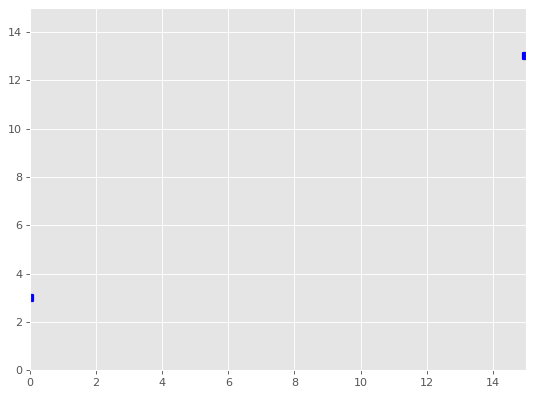

[0] [3]
[15] [13]
{0: [0, 3], 1: [15, 13]}


In [38]:
xval_={}
yval_={}
for n in range(ANTENNA_N):
  max_value =np.max((q_table[n]))
  print(max_value)
  for i in range(SIZE_W):
    for j in range(SIZE_H):
      for k in range(4):
        if max_value == (q_table[n][i][j][k]):
          xval_[n]=[i]
          yval_[n]=[j]
        else :
          continue
#outputOfTraining(q_table)
figure(figsize=(8, 6), dpi=80) # increase figure size 
print(xval_,yval_)
for n in range(ANTENNA_N):
  plt.scatter(xval_[n], yval_[n], color= "blue", linewidths =2 ,marker ="s")
plt.xlim(0, SIZE_H-1)
plt.ylim(0, SIZE_W-1)
plt.show()
antennas_object_toplot_heat={}
for n in range(ANTENNA_N):
  print(xval_[n],yval_[n])
  antennas_object_toplot_heat[n]=[xval_[n][0],yval_[n][0]]
print(antennas_object_toplot_heat)


Average SNR must be constant 

assume that power adds up (SNR) -> reward 
qtable -> add the positions of new antenna and actions 
3 antennas optimization all area 


In [39]:
antennas_object_heatmap={} #dict for antennas and their position 
SumOfSNR=np.zeros((1,SIZE_H*SIZE_W))
position=[]
for n in range(ANTENNA_N):
  x=antennas_object_toplot_heat[n][0]
  y=antennas_object_toplot_heat[n][1]
  antennas_object_heatmap[n]=antenna(x,y)
  #1d coordinate 
  position.append((SIZE_H*x)+ y)
  ArrayOfSNR=measureSNR(antennas_object_heatmap[n],SIZE_H,SIZE_W,typeOfAntenna="omnidirectionnel")
  ## convert from magnitude to db 
  ArrayOfSNR=10*np.log10(ArrayOfSNR)
  ArrayOfSNR=np.insert(ArrayOfSNR,position[n],0)
  SumOfSNR=np.add(SumOfSNR,ArrayOfSNR)
for i in range(len(SumOfSNR)):
  SumOfSNR[i]/=ANTENNA_N #average 
print(len(SumOfSNR[0])) 

256


In [40]:
import pandas as pd
import seaborn as sns
# sns.set()
snr_db=SumOfSNR
#for SNR in (SumOfSNR):
#  out_=10*np.log10(SNR)
#  snr_db.append(out_)
#print(snr_db)
# Build data
max_value_snr=np.max(snr_db)
min_value_snr=np.min(snr_db)
print(max_value_snr)
print(min_value_snr)

-59.09283495479218
-144.89153388557264


1


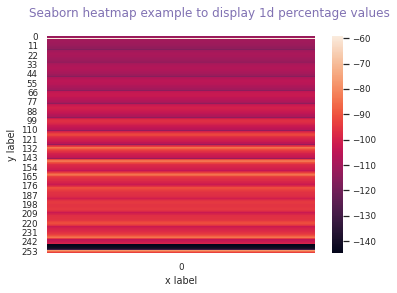

In [41]:
## 1D heatmap
plt.figure()
plt.suptitle("Seaborn heatmap example to display 1d percentage values", color='m')
sns.set(font_scale=0.8)

print(len(snr_db))
snr_db=np.reshape(snr_db,((SIZE_H*SIZE_W),1)) ## size_w*size_h -1
ax = sns.heatmap(snr_db, vmin=min_value_snr, vmax=max_value_snr)
ax.set(xlabel='x label', ylabel='y label')

plt.show()

In [42]:
#create 2D heatmap
rows=[]
#print(type(snr_db[0]))
# insert a value
#convert 2d array 
snr_db=np.reshape(snr_db,(SIZE_H,SIZE_W))
#snr_db=10*(np.log10(snr_db))
print(snr_db)
for n in range(ANTENNA_N):
  x=antennas_object_toplot_heat[n][0]
  y=antennas_object_toplot_heat[n][1]
  snr_db[y][x]=0
#print(snr_db)
rows=snr_db
print(rows) 


[[-112.72822098 -112.11465759 -111.6132082   -59.09283495 -110.93758937
  -110.71314776 -110.6263149  -110.66906847 -110.82827757 -111.08859822
  -111.43489334 -111.85370036 -112.33376179 -112.86590177 -113.44257824
  -114.05736659]
 [-116.92740687 -110.94444338 -110.23946548 -109.67115171 -109.26192103
  -109.02276259 -108.95124766 -109.03340215 -109.24836477 -109.57353131
  -109.98831891 -110.47594401 -111.02358805 -111.62166009 -112.26276887
  -112.94078404]
 [-116.15033796 -109.38064909 -108.54828227 -107.88109001 -107.41382417
  -107.16272538 -107.12135297 -107.26468303 -107.55864523 -107.96952268
  -108.46959212 -109.03871345 -109.66334937 -110.33458391 -111.0461418
  -111.79286824]
 [-115.39188498 -107.69553294 -106.69046449 -105.88784878 -105.34551479
  -105.08969805 -105.1052663  -105.34551479 -105.75313025 -106.27765648
  -106.88293829 -107.54673574 -108.25693773 -109.00735426 -109.79436123
  -110.61470848]
 [-114.66160696 -105.87786984 -104.62858587 -103.62871428 -102.983135

<Figure size 432x288 with 0 Axes>

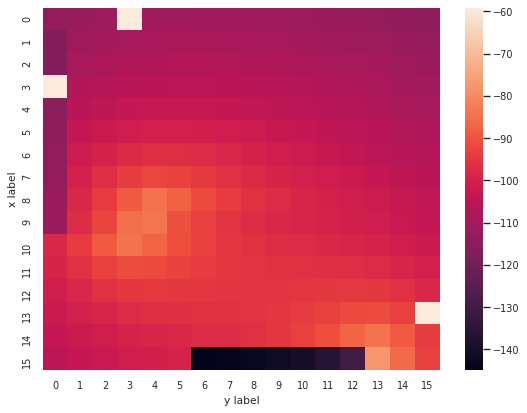

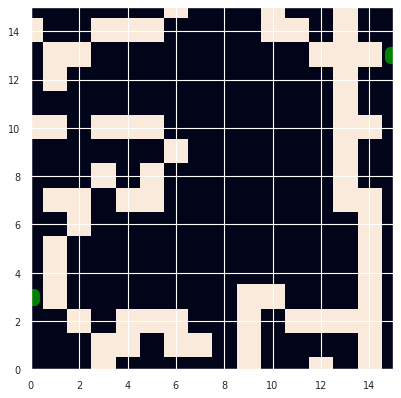

In [44]:
#2D heatmap
plt.figure()
plt.suptitle("Seaborn heatmap example to display 2d percentage values", color='m')
sns.set(font_scale=0.8)

#print(type(rows))
figure(figsize=(8, 6), dpi=80) # increase figure size 
rows_db=np.reshape(rows,(SIZE_H,SIZE_W))
ax = sns.heatmap(rows_db, vmin=min_value_snr, vmax=max_value_snr)
ax.set(xlabel='y label', ylabel='x label')


plt.show()
figure(figsize=(8, 6), dpi=80) # increase figure size 
for n in range(ANTENNA_N):
  plt.scatter(xval_[n], yval_[n], color= "green", linewidths =10 ,marker ="s")
plt.xlim(0, SIZE_H-1)
plt.ylim(0, SIZE_W-1)
plt.imshow(edges)
plt.show()